In [1]:
from lib_sections import dict_to_graph
from lib_model import LibModel
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
df = pd.read_csv('notebooks/data/20230413_clb_taps.csv')
# df['Datetime'] = pd.to_datetime(df['Datetime'])
# entry_df = df.set_index('Datetime')
# entry_df = entry_df[entry_df['Direction']=='Entry']['Direction'].resample('10min',  label='left').count().reset_index()
# entry_df.columns = ['timestamp', 'entry_counts']
# entry_df

In [3]:
import json
# Opening JSON file
lib_sections_file = open('static/lib_sections.json')
lib_sections = json.load(lib_sections_file)
sections_attrs_file = open('static/sections_attrs.json')
sections_attrs = json.load(sections_attrs_file)
connections_file = open('static/connections.json')
connections = json.load(connections_file)

In [4]:
lib_graph = dict_to_graph(lib_sections, sections_attrs, connections)
lib_graph


In [5]:
model = LibModel(df, lib_graph, exam_period=False)
model.run()
results = model.datacollector.get_model_vars_dataframe()
# results['timestamp'] = entry_df['timestamp']
# sns.lineplot(results, x='timestamp', y='num_agents')


<Axes: >

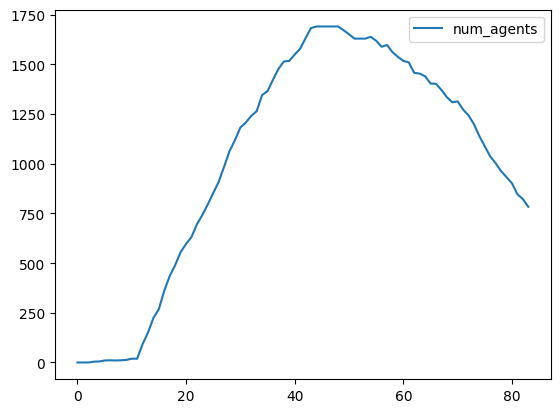

In [6]:
sns.lineplot(results)

In [9]:


results2 = model.datacollector.get_table_dataframe("SectionsData")
results2['utilization_rate'] = 1-results2['empty_seats']/results2['capacity']
results2

,timestamp,section,level,seat_type,capacity,empty_seats,utilization_rate
0,2023-04-12 22:50:00+00:00,clb_3-movable_seat,clb_3,movable_seat,250.0,250.0,0.0
1,2023-04-12 22:50:00+00:00,clb_3-4_man_seat,clb_3,4_man_seat,0.0,0.0,NaN
2,2023-04-12 22:50:00+00:00,clb_3-8_man_seat,clb_3,8_man_seat,0.0,0.0,NaN
3,2023-04-12 22:50:00+00:00,clb_3-window_seat,clb_3,window_seat,0.0,0.0,NaN
4,2023-04-12 22:50:00+00:00,clb_3-sofa,clb_3,sofa,10.0,10.0,0.0
...,...,...,...,...,...,...,...
3775,2023-04-13 12:40:00+00:00,wbs_6-sofa,wbs_6,sofa,0.0,0.0,NaN
3776,2023-04-13 12:40:00+00:00,wbs_6-soft_seat,wbs_6,soft_seat,0.0,0.0,NaN
3777,2023-04-13 12:40:00+00:00,wbs_6-cubicle,wbs_6,cubicle,40.0,12.0,0.7
3778,2023-04-13 12:40:00+00:00,wbs_6-d_cubicle,wbs_6,d_cubicle,0.0,0.0,NaN


In [12]:
agents = model.datacollector.get_agent_vars_dataframe()
agents

chosen_seat  satisfaction
Step AgentID                                   
3    3-0        clb_4-window_seat      3.481058
     3-1        clb_4-window_seat      3.513243
     3-2            clb_6-cubicle      3.506925
     3-3            wbs_6-cubicle      3.663994
4    3-0        clb_4-window_seat      3.481058
...                           ...           ...
83   83-3         clb_3-soft_seat      2.926962
     83-4     wbs_6-diagonal_seat      2.990305
     83-5         clb_4-soft_seat      2.962329
     83-6     wbs_6-diagonal_seat      2.917572
     83-7           wbs_6-cubicle      3.072116

[85965 rows x 2 columns]

In [47]:
agent_corr

,,satisfaction
chosen_seat,,
clb_3-d_cubicle,satisfaction,1.0
clb_3-movable_seat,satisfaction,1.0
clb_3-sofa,satisfaction,1.0
clb_3-soft_seat,satisfaction,1.0
clb_4-sofa,satisfaction,1.0
clb_4-soft_seat,satisfaction,1.0
clb_4-window_seat,satisfaction,1.0
clb_5-4_man_seat,satisfaction,1.0
clb_5-8_man_seat,satisfaction,1.0


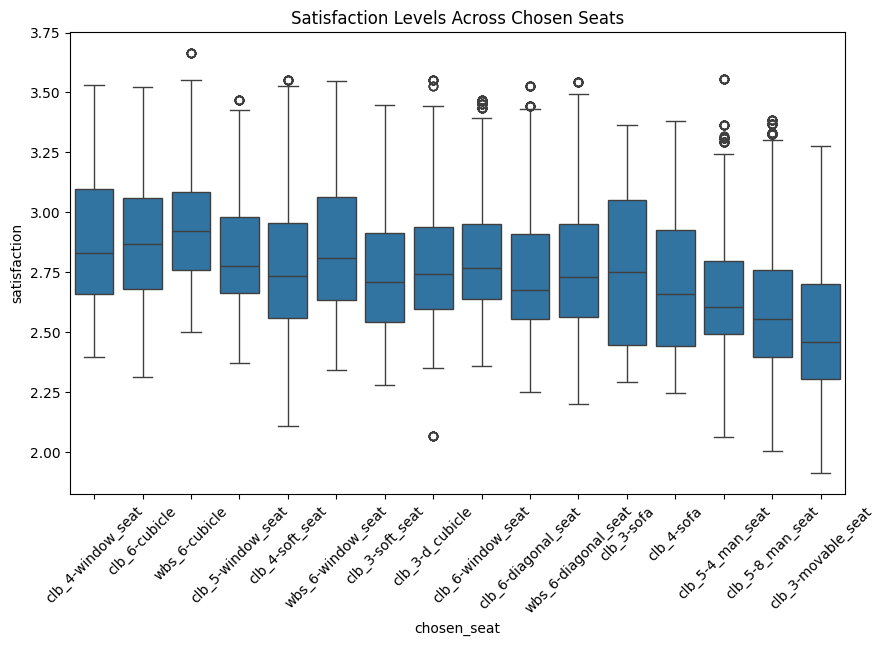

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=agents, x='chosen_seat', y='satisfaction')
plt.title('Satisfaction Levels Across Chosen Seats')
plt.xticks(rotation=45)
plt.show()


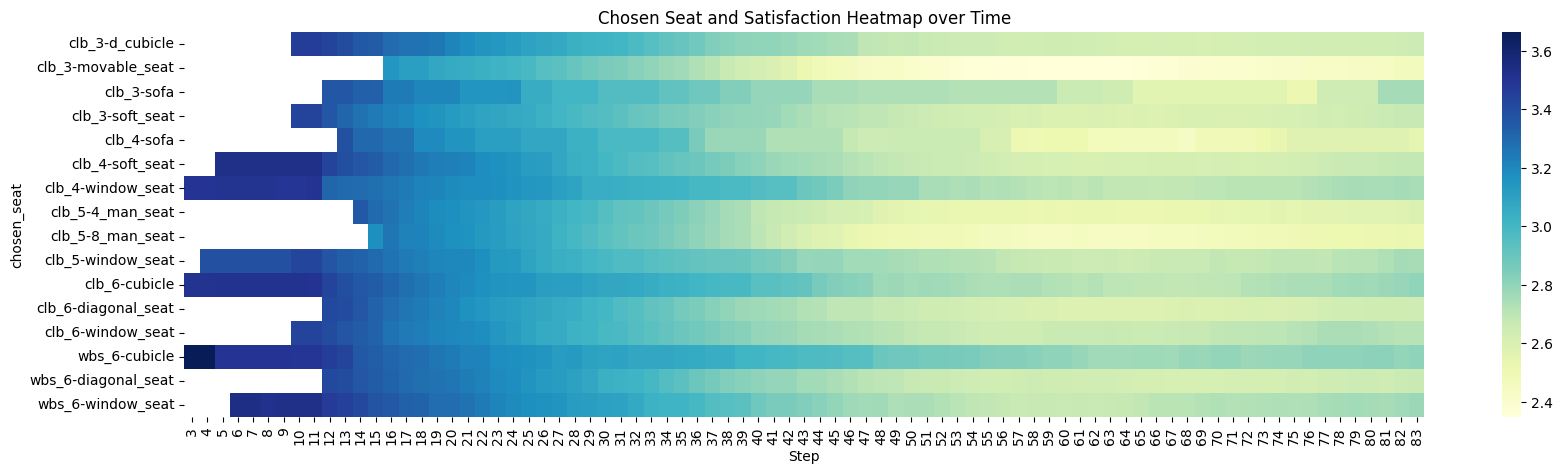

In [27]:
heatmap_data = agents.pivot_table(values='satisfaction', index='chosen_seat', columns=agents.index.get_level_values('Step'))
plt.figure(figsize=(20, 5))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=False, fmt=".2f")

plt.title('Chosen Seat and Satisfaction Heatmap over Time')
plt.show()

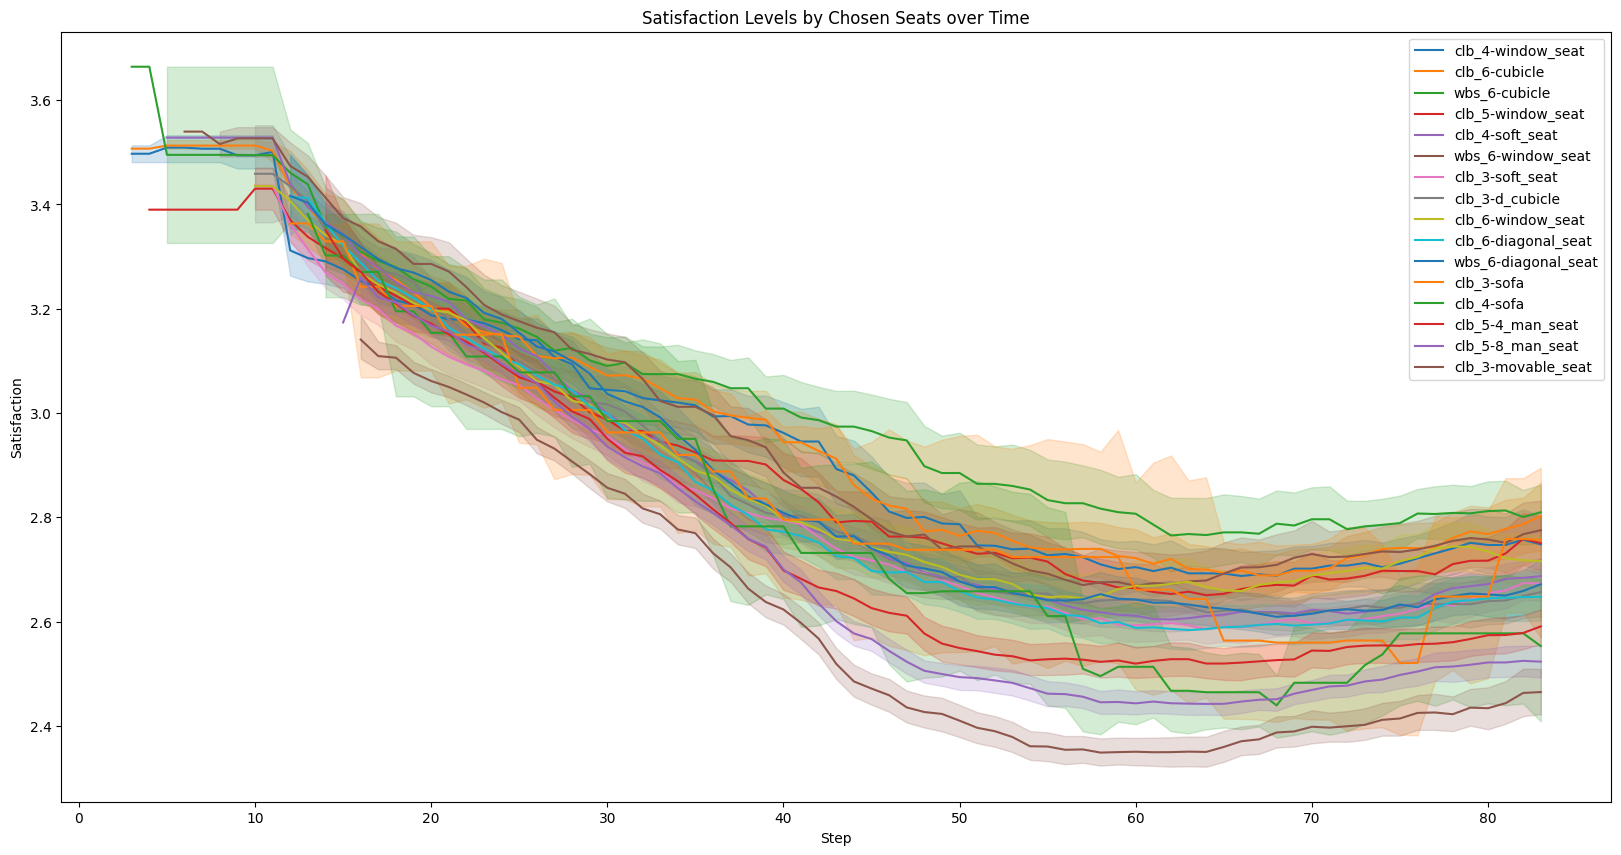

In [46]:


# Reformatting the table for easy plotting
satisfaction_data = agents.reset_index()
chosen_seats = satisfaction_data['chosen_seat'].unique()

plt.figure(figsize=(20, 10))


for seat in chosen_seats:
    data = satisfaction_data[satisfaction_data['chosen_seat'] == seat]
    sns.lineplot(x=data['Step'], y=data['satisfaction'], label=seat)

''' specific seat only
data = satisfaction_data[satisfaction_data['chosen_seat'] == 'clb_5-8_man_seat']
plt.plot(data['Step'], data['satisfaction'], label='clb_5-8_man_seat')
'''


plt.title('Satisfaction Levels by Chosen Seats over Time')
plt.xlabel('Step')
plt.ylabel('Satisfaction')
plt.legend()
plt.show()
